![](/home/ubuntu/CmsOpenData/AnalysisDesigner/datafiles/cms.png)
 

<p style="margin-right:8%; margin-left:8%; font-size:25px; font-weight: 200; line-height: 1.5em">
**Second Part: How to carry out a selection criteria in the Analysis?**

## Part2: Candidates selection
This part is divided in two parts: 

* Apply a selection criteria 
* Evaluate the distribution performance

In this second step, you must look at **Analyzer_Selection.py** script. This code, again, reads each event of the tree, but instead of filling directly the histograms, it makes a selection for each particle in the event. The selection criteria has been stablished in **Cuts.py** script. Take a look into Analyzer_Selection.py and Cuts.py and notice that a few amount of muons pass the cuts depending on the value of their variables. 

The result of this analysis is a set of histograms that contain valuable statistic information about each kinematic variable for all selected particles produced a long of all events. The aim of this exercise is getting the right muon collection produced in Z->mumu decays. 


**NOTE:** 

For each exercise, to run the code is necessary to import **ROOT**.

In [21]:
# Import ROOT
import ROOT

In [22]:
cd /home/ubuntu/CmsOpenData/AnalysisDesigner

/home/ubuntu/CmsOpenData/AnalysisDesigner


* ### Run the Analysis with the selection criteria, already, stablished in the Cuts module. 
<p style="margin-right:0%; margin-left:0%; font-size:14px; font-weight: 200; line-height: 1.2em">
Before performing the analysis, you must define the cut parameter for all the muon variables, in **Cuts.py** script. Then, you just run the module **Analyzer_Selection.py** and  obtain a root file: **goodHistos.root** stored in **datafiles** folder that contains the histograms for all muons. Each histogram is saved with a name started by *g_* followed by the *name of the kinematic variable*.
<p style="margin-right:0%; margin-left:0%; font-size:14px; font-weight: 200; line-height: 1.2em">
*Cuts (pt_min, eta_max,distance, dB_max, isolation, mass_min, chi2, numValidHits) * 

In [23]:
# Define the Cuts for your Selection for each muon variable or change, directly, in the Selector
pt_min = 5
eta_max = 2.4
distance = 0.2
dB_max = 0.02 # cm. dB=impact parameter
isolation = 0.15
#dimensionless. (sumPt+emEnergy+hadEnergy)/muon.pt = maxima energia antes de considerarlo como un jet de particulas.
mass_min = 60
normChi2 = 10
numValidHits = 10

In [24]:
# Define the class for Selector
class Selector(object):
        ''' Class that make the selection from a defined Cuts'''
        #def __init__(self):
        #    print '''***Selector created'''
        
        def selector(self, analysis, particle):

                '''Main class for making the selection'''
                if not analysis.Muon_isGlobalMuon[particle]:
                        return False
                analysis.h_efficiency.Fill(2)

                if not analysis.Muon_isTrackerMuon[particle]:
                        return False
                analysis.h_efficiency.Fill(3)

                if analysis.Muon_pt [particle] < pt_min:
                        return False
                analysis.h_efficiency.Fill(4)

                if analysis.Muon_eta[particle] > eta_max:
                        return False
                analysis.h_efficiency.Fill(5)

                if analysis.Muon_dB[particle] > dB_max:
                        return False

                analysis.h_efficiency.Fill(6)

                if ((analysis.Muon_isolation_sumPt[particle]+analysis.Muon_isolation_emEt[particle]+analysis.Muon_isolation_hadEt[particle])/analysis.Muon_pt[particle]) > cuts.isolation:
                        return False
                analysis.h_efficiency.Fill(7)

                if analysis.Muon_distance[particle] > distance:
                        return False

                analysis.h_efficiency.Fill(8)

                if analysis.Muon_normChi2[particle] > normChi2:
                        return False

* ### Run the Analysis with the selection criteria, already, stablished in the Cuts module. 
<p style="margin-right:0%; margin-left:0%; font-size:14px; font-weight: 200; line-height: 1.2em">
Before performing the analysis, you must define the cut parameter for all the muon variables, in **Cuts.py** script. Then, you just run the module **Analyzer_Selection.py** and  obtain a root file: **goodHistos.root** stored in **datafiles** folder that contains the histograms for all muons. Each histogram is saved with a name started by *g_* followed by the *name of the kinematic variable*.

In [25]:
import os
import logging

# Import the main module which run the analysis for ALL MUONS
from Analyzer_Selection import AnalyzerSel


# Instance of AnalyzerAll
analysis = AnalyzerSel()

In [26]:
#Loop over events
#--------------------------------------------------------------------
analysis.beginJob("goodhistos.root")
print "Start the Analysis"

# For each event or entry,the following loop populates the tree branches, creates every muon and add it to all_muons list

for event in range(0, analysis.numEntries):
    analysis.process(event)
        
analysis.endJob()

*** Begin job
Start the Analysis
*** writing file <ROOT.TFile object ("datafiles/goodhistos.root") at 0x5c63f60>
*** done


* ### Check your g_histogram
<p style="margin-right:0%; margin-left:0%; font-size:14px; font-weight: 200; line-height: 1.2em">
Open the goodHistos.root file for reading and printing the list of histograms saved in it. 
In the selection was added a new variable called efficiency. The *efficiency* is defined by:
<p style="margin-right:0%; margin-left:0%; font-size:14px; font-weight: 200; line-height: 1.2em">
**efficiency = Number of events after cut N / Number of events after cut N-1**

In [27]:
# Get the root file that contains the histograms for selected muons: goodHistos.root.
Gfile = ROOT.TFile("datafiles/goodhistos.root", "read")
# List the histograms in the file
Gfile.ls()

TFile**		datafiles/goodhistos.root	
 TFile*		datafiles/goodhistos.root	
  KEY: TH1F	h_efficiency;1	efficiency
  KEY: TH1F	h_pt;1	Muons Transverse Momentun
  KEY: TH1F	h_px;1	Muons x- Momentun
  KEY: TH1F	h_py;1	Muons y- Momentun
  KEY: TH1F	h_pz;1	Muons z- Momentun
  KEY: TH1F	h_eta;1	Angle Transvese
  KEY: TH1F	h_energy;1	Muons Energy
  KEY: TH1F	h_dz;1	Distance from Primary vertex Z 
  KEY: TH1F	h_charge;1	Muons Charge
  KEY: TH1F	h_normChi2;1	Muons Chi2/ndof
  KEY: TH1F	h_numberOfValidHits;1	Number of Valid Hits
  KEY: TH1F	h_dB;1	Impact Parameter
  KEY: TH1F	h_isolation_sumPt;1	Tracker Isolation
  KEY: TH1F	h_isolation_emEt;1	ECAL Isolation
  KEY: TH1F	h_isolation_hadEt;1	HCAL Isolation
  KEY: TH1F	h_isolation;1	Relative Isolation
  KEY: TH1F	h_mass;1	MassInv


* ### Draw Histos
<p style="margin-right:0%; margin-left:0%; font-size:14px; font-weight: 200; line-height: 1.2em">
Once you have that file,  the next step is to plot the histogram. Follow the methods in example1 to plot only one histogram and see below how to display two histograms in the same canvas. 

** 4.** Draw more than one histogram in the same canvas

It can be nice to compare more than one histogram in the same canvas. To do that you must create the two histograms as you want to draw, but just one canvas. For example, we are going to draw histograms for pt variable using the selected and all values.

TCanvas::Constructor:0: RuntimeWarning: Deleting canvas with same name: myCanvas


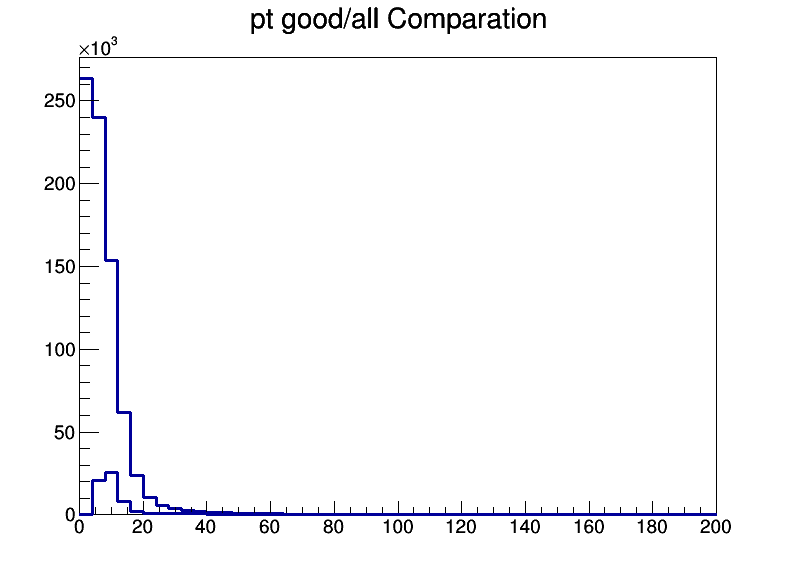

In [28]:
### Get the root file that contains the histograms for all muons: histos.root.
Hfile = ROOT.TFile("datafiles/histos.root", "read")

### You must create a variable to store the histograms selected.
histo1 = Hfile.Get('h_pt')
histo2 = Gfile.Get('h_pt')

### Then create again a new the canvas where the histograms are going to be drawn
canvas = ROOT.TCanvas("myCanvas","All muons: Pt",800,600)

from ROOT import gStyle
### One more time, draw the histogram
histo1.SetTitle("pt good/all Comparation")

# To not print the top-right box of the first histogram
gStyle.SetOptStat(0)

# Draw the histograms in the same canvas
histo1.Draw()
histo2.Draw("same")


### At last, draw the canvas
canvas.Draw()

** 4.1.** And set again your preferences. ** PAY ATTENTION :** some settings are applied on the histo variable some others on the canvas.  

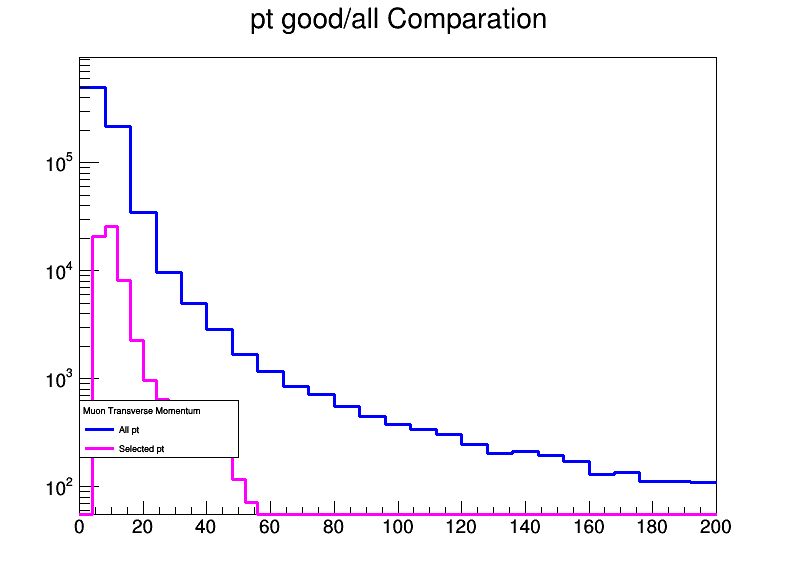

In [29]:
### Change the line color 
histo1.SetLineColor(4)
histo2.SetLineColor(6)

### Change the bounds of the histograms for X Axis 
histo1.GetXaxis().SetRangeUser(40, 120);
histo2.GetXaxis().SetRangeUser(0, 200);

### Change the bins for the histograms by diving by a divisor of the initial number of bins. 
## Note: To restore the binning you must to draw the histo again.
histo1.Rebin(2)

### Create the legend. TLegend(x1, y1, x2, y2)
legend =ROOT.TLegend(0.1,0.2,0.30,0.3);
legend.SetHeader("Muon Transverse Momentum");
legend.AddEntry(histo1, "All pt","l");
legend.AddEntry(histo2, "Selected pt","l");

#legend->AddEntry("gr","Graph with error bars","lep");
legend.Draw();

### Twist linear scale for Y axe to the logaritmic one with the function SetLogy.
canvas.SetLogy()

### Draw the histogram again and check your changes 
canvas.Draw()

TCanvas::Constructor:0: RuntimeWarning: Deleting canvas with same name: myCanvas


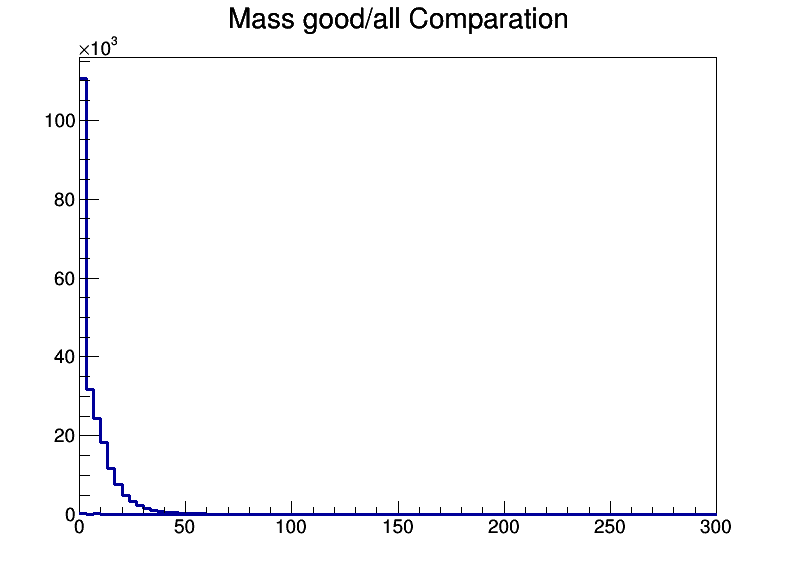

In [30]:
### You must create a variable to store the histograms selected.
histo3=Hfile.Get('h_mass')
histo4=Gfile.Get('h_mass')

### Then create again a new the canvas where the histograms are going to be drawn
canvas = ROOT.TCanvas("myCanvas","All muons: mass",800,600)

from ROOT import gStyle
### One more time, draw the histogram
histo3.SetTitle("Mass good/all Comparation")

# To not print the top-right box of the first histogram
gStyle.SetOptStat(0)
# Draw the histograms in the same canvas
histo3.Draw()
histo4.Draw("same")


### At last, draw the canvas
canvas.Draw()

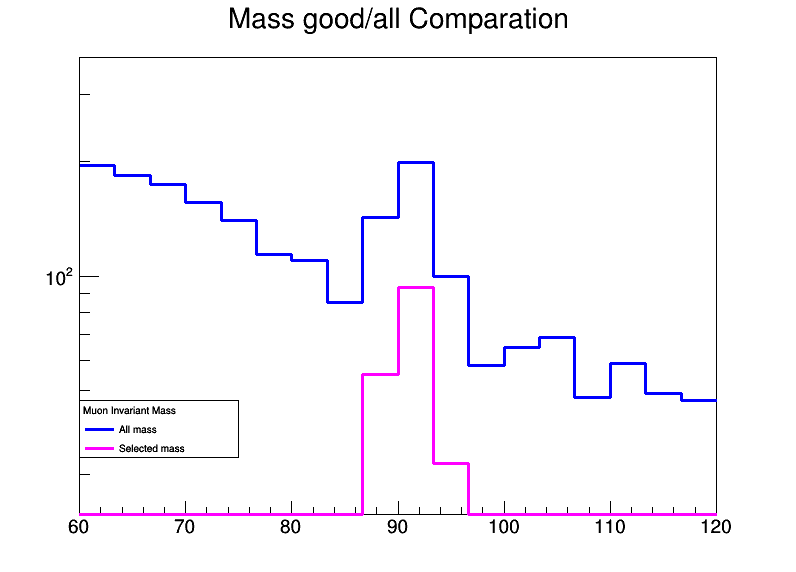

In [31]:
### Change the line color 
histo3.SetLineColor(4)
histo4.SetLineColor(6)

### Change the bounds of the histograms for X Axis 
histo3.GetXaxis().SetRangeUser(60, 120);
histo4.GetXaxis().SetRangeUser(60, 120);

### Change the bins for the histograms by diving by a divisor of the initial number of bins. 
## Note: To restore the binning you must to draw the histo again.
#histo1.Rebin(2)

### Create the legend. TLegend(x1, y1, x2, y2)
legend =ROOT.TLegend(0.1,0.2,0.30,0.3);
legend.SetHeader("Muon Invariant Mass");
legend.AddEntry(histo1, "All mass","l");
legend.AddEntry(histo2, "Selected mass","l");

#legend->AddEntry("gr","Graph with error bars","lep");
legend.Draw();

### Twist linear scale for Y axe to the logaritmic one with the function SetLogy.
canvas.SetLogy()

### Draw the histogram again and check your changes 
canvas.Draw()